# Winston.jl unofficial short tutorial

- [Winston.jl official page](https://github.com/nolta/Winston.jl)
- [Winston.jl official document](http://winston.readthedocs.org/en/latest/index.html)

In [14]:
# disable deprecation warning
if VERSION >= v"0.4-rc1"
  unsafe_store!(cglobal(:jl_options, Base.JLOptions),
                Base.JLOptions(map(fieldnames(Base.JLOptions)) do name
                                 name==:depwarn?0:getfield(Base.JLOptions(), name) end...
                              ))
end

Ptr{Base.JLOptions} @0x000000010cd1ba00

In [2]:
using Winston


Use "AbstractVecOrMat{T}(" instead.


In [16]:
# prepare data
xs = collect(linspace(0,20.0))
exps = exp(xs)
sqs = xs.*xs

50-element Array{Float64,1}:
   0.0     
   0.166597
   0.666389
   1.49938 
   2.66556 
   4.16493 
   5.9975  
   8.16327 
  10.6622  
  13.4944  
  16.6597  
  20.1583  
  23.99    
   ⋮       
 240.566   
 253.394   
 266.556   
 280.05    
 293.878   
 308.038   
 322.532   
 337.359   
 352.52    
 368.013   
 383.84    
 400.0     

# simple plots

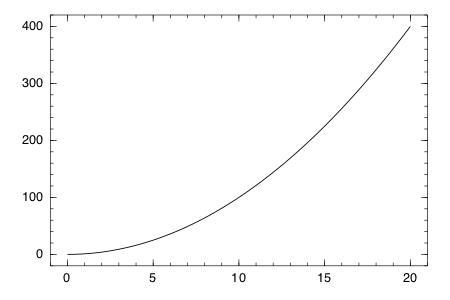

In [4]:
# plot data as line
plot(xs, sqs)

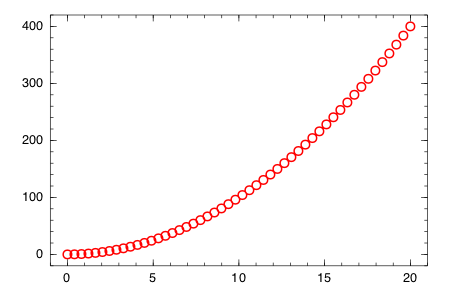

In [5]:
# plot data as red circles
plot(xs, sqs, "ro")

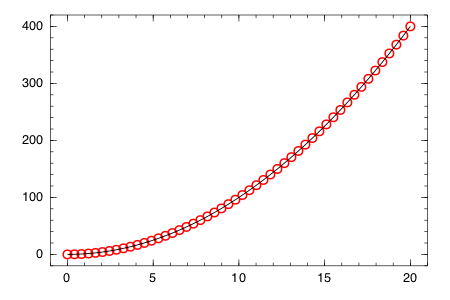

In [6]:
# overlay
oplot(xs, sqs)

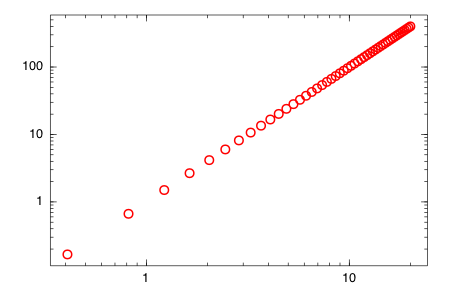

In [8]:
# log-log plot
loglog(xs, sqs, "ro")

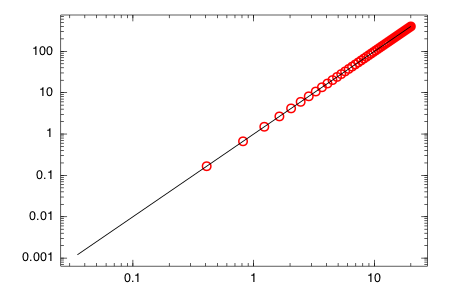

In [9]:
# hold (do not clear) the previous figure
hold(true)
# plot function (y = x*x, x ∈ [0,20])
fplot(abs2, (0,20))
hold(false)

# replot
oplot()

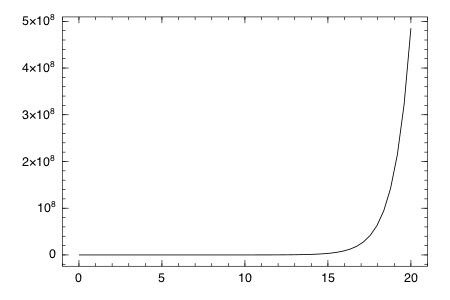

In [10]:
plot(xs, exps)

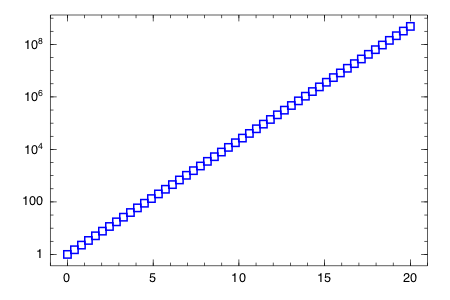

In [11]:
# normal-log plot (blue squares)
semilogy(xs, exps, "bs")

# complicated plots

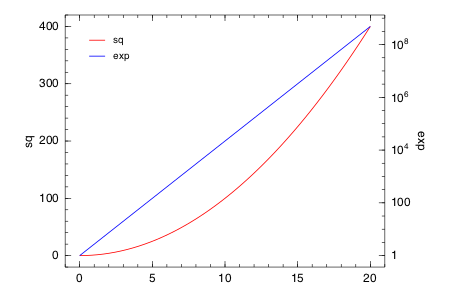

In [12]:
p = FramedPlot()

# y = x*x as red line
sq_plot  = Curve(xs, sqs, color="red")
# y = exp(x) as blue line
exp_plot = Curve(xs, exps, color="blue")

# locate legend at (0.1, 0.9)
# (0,1)    (1,1)
#      o--o
#      |  |
#      o--o
# (0,0)   (1,1)
l = Legend(.1, .9, [sq_plot, exp_plot])

# set legend labels
setattr(sq_plot, label="sq")
setattr(exp_plot, label="exp")

# set label for the left vertical axes (y1)
setattr(p.y1, label="sq")

# set label the right vertical axes (y2)
# and let y2 be log scale
setattr(p.y2, label="exp", log=true, draw_ticklabels=true)

# plot y=x*x on left axes
add(p, sq_plot, l)

# plot y=exp(x) on right axes
Winston.add2(p, exp_plot)

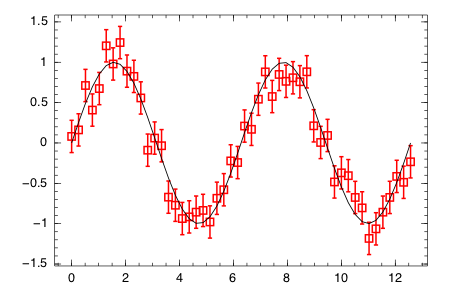

In [17]:
let xs = linspace(0.0, 4π, 50),
    σ = 0.2,
    ys = sin(xs) + σ*randn(length(xs))
    
    p = FramedPlot()

    # point plot (red square symbols)
    y_plot = Points(xs, ys, color="red", kind="square")

    # errorbar (red color)
    y_err = SymmetricErrorBarsY(xs, ys, fill(σ, length(xs)))
    style(y_err, color="red")

    # sine curve
    curve = Curve(xs, sin(xs))
    add(p, y_plot, y_err, curve)
end